# Loading Dependencies

In [16]:
import numpy as np                                             # to perform numerical operation
import pandas as pd                                            # to manipulate data
import matplotlib.pyplot as plt                                # to plot data into different graphs
from sklearn.linear_model import LogisticRegression            # for Machine Learning algorithms (Logistic Regression)
from sklearn.model_selection import cross_val_score            # for Cross validation score
from sklearn.ensemble import RandomForestClassifier            # for Machine Learning algorithms (Random Forest)

# Read Data

In [17]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Size of Data

In [18]:
titanic_df.shape

(891, 12)

# Overview of Dataset

In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observe that many values are missing for the "Cabin" column and some values are missing for the "Age" and "Embarked" column

# Handling Missing Data

**1. Delete Row/Column**
- For columns/rows with many missing fields (e.g. "Cabin")

**2. Replace with Mean/Median/Mode**
- For columns/rows with few missing values
- Replace missing entires with the mode value

Text(0, 0.5, 'Frequency')

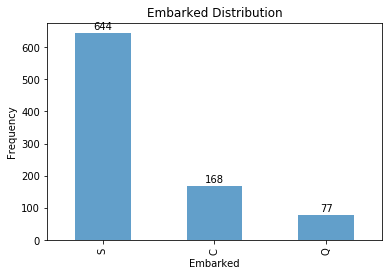

In [20]:
ax = titanic_df['Embarked'].value_counts().plot(kind='bar', alpha=0.7)
rects = ax.patches
labels = ["%d" % i for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() /2, height + 5, height, ha='center', va='bottom')
plt.title("Embarked Distribution")
plt.xlabel("Embarked")
plt.ylabel("Frequency")

In [58]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

**3. Predict Missing Value**
- A null value can be predicted using other features that do not have missing values
- E.g. age can be predicted using machine learning where other features such as Pclass, Sex, Fare, etc. are used

# Data Preparation

## Data Visualization

Text(0, 0.5, 'Normalized Count')

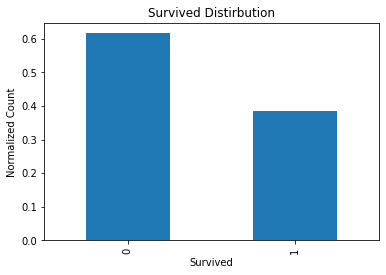

In [22]:
titanic_df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survived Distirbution')
plt.xlabel('Survived')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

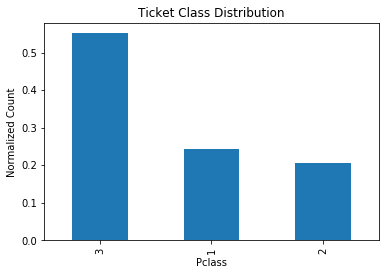

In [24]:
titanic_df['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.title('Ticket Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

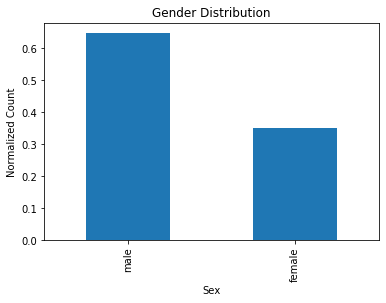

In [25]:
titanic_df['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

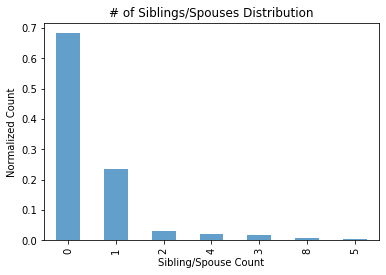

In [26]:
titanic_df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Siblings/Spouses Distribution')
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Normalized Count')

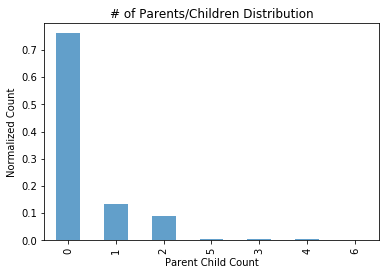

In [28]:
titanic_df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Parents/Children Distribution')
plt.xlabel('Parent Child Count')
plt.ylabel('Normalized Count')

Text(0, 0.5, 'Frequency')

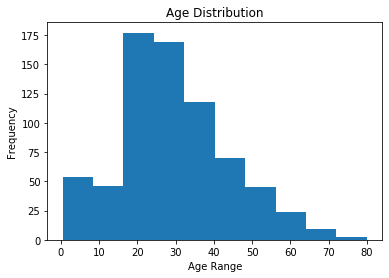

In [29]:
titanic_df['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

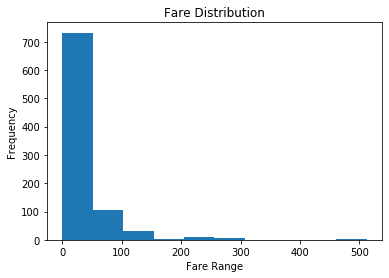

In [30]:
titanic_df['Fare'].plot(kind='hist')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Age vs Female vs Class3')

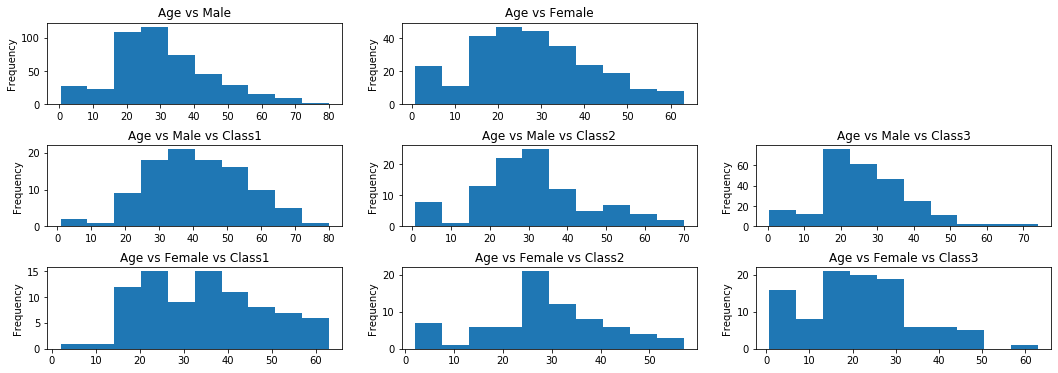

In [35]:
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=0.5)

plt.subplot2grid((3,3), (0,0))
titanic_df['Age'][(titanic_df['Sex']=='male')].plot(kind='hist')
plt.title('Age vs Male')
plt.subplot2grid((3,3), (0,1))
titanic_df['Age'][(titanic_df['Sex']=='female')].plot(kind='hist')
plt.title('Age vs Female')
plt.subplot2grid((3,3), (1,0))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass'] == 1)].plot(kind='hist')
plt.title('Age vs Male vs Class1')
plt.subplot2grid((3,3), (1,1))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Male vs Class2')
plt.subplot2grid((3,3), (1,2))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Male vs Class3')
plt.subplot2grid((3,3), (2,0))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Female vs Class1')
plt.subplot2grid((3,3), (2,1))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Female vs Class2')
plt.subplot2grid((3,3), (2,2))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Female vs Class3')

Calculate the median age of passengers who are grouped by ticket class and sex and assign those median values to null values in the corresponding groups.

In [39]:
titanic_df['Age']=titanic_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Text(0, 0.5, 'Survived Frequency (Normalized)')

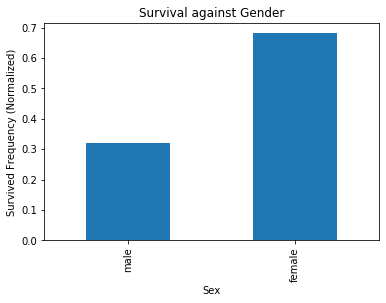

In [40]:
titanic_df['Sex'][titanic_df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')
plt.title('Survival against Gender')
plt.xlabel('Sex')
plt.ylabel('Survived Frequency (Normalized)')

Text(0.5, 1.0, 'Ticket Class vs Survival')

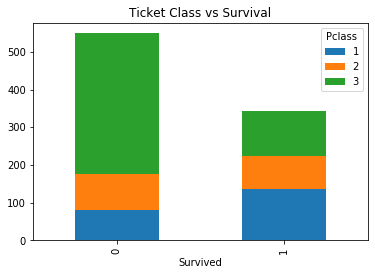

In [41]:
titanic_df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Ticket Class vs Survival')

Text(0, 0.5, 'Count')

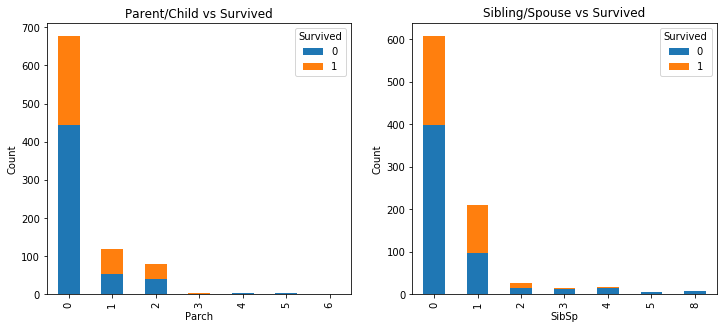

In [43]:
fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=0.5)

ax=plt.subplot2grid((1,2), (0,0))
titanic_df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax=plt.subplot2grid((1,2), (0,1))
titanic_df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Sibling/Spouse vs Survived')
plt.ylabel('Count')

**Feature Engineering**: process of feature extracction from raw dataset using domain knolwedge.

In [54]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

Text(0.5, 1.0, 'Family vs Survival')

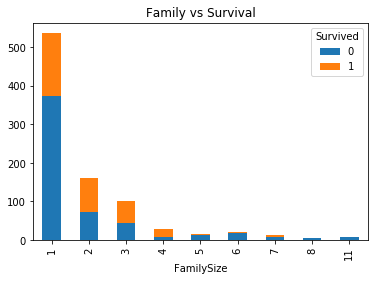

In [56]:
titanic_df.groupby(['FamilySize', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Family vs Survival')

In [59]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [61]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
test["Age"] = test.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test["Fare"] = test["Fare"].fillna(test["Fare"].dropna().median())   
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [66]:
X_train = titanic_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
X_test = test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
labels_to_encode = ['Pclass', 'Sex', 'Embarked']
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix = label))
    X_train.drop(label, axis=1, inplace=True)
for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix = label))
    X_test.drop(label, axis=1, inplace=True)
y = titanic_df['Survived'].values

In [67]:
X_train.head(1)

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.25,2,0,0,1,0,1,0,0,1


# Train Model

Start with Logistic Regression

In [68]:
lr_model = LogisticRegression(solver='liblinear')

In [69]:
scores = cross_val_score(lr_model, X_train, y, cv=5)
print(round(np.mean(scores*100)))
lr_model.fit(X_train,y)
predictions_lr = lr_model.predict(X_test)
submissions_lr = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions_lr
})
submissions_lr.to_csv('titanic_lr.csv', index=False)

80.0


Using Random Forest Classifier

In [70]:
rfclr = RandomForestClassifier(n_estimators=100, max_depth=7)
scores = cross_val_score(rfclr, X_train, y, cv=5)
print(round(np.mean(scores*100)))
rfclr.fit(X_train, y)
predictions_rf = rfclr.predict(X_test)
submission_rf = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions_rf
})
submission_rf.to_csv('titanic_dt.csv', index=False)

82.0
